# <center>Diamonds</center>
<center>aka, the "Sarah gets a diamond" dataset (Kinda, maybe. But probably not.)<center>

----

## Background

Years ago, I was tooling around on either the [UVA Darden Graduate School of Business](https://www.darden.virginia.edu/) or the [Harvard Business School](https://www.hbs.edu/Pages/default.aspx) website and came across a dataset called "Sarah gets a diamond". Apparently, it's a fairly well known dataset amongst the MBA crowd and you can still [find it for sale](https://hbsp.harvard.edu/product/UV0869-PDF-ENG) on the web.

I saved it for future use because I thought it was easily graspable and pretty good for a regression model. I also thought this was the dataset but I don't think it is now because that dataset says it has the prices for 6000 diamonds and this is considerably more at 219,704 rows.

If you're interested in developing a bit of domain knowledge, the [history of how diamonds are graded](https://www.thediamondauthority.org/the-diamond-grading-system/) is interesting but, unlike the links for the terms below which are of immediate relevance, I recommend you read it later.

## Overview of the column terms

#### Rather than go though all details for all the columns, I'll sumeraize and provide links that will have you talking like an expert in no time:
 * `clarity` refers the amount of inclusions (i.e., [internal flaws](https://4cs.gia.edu/en-us/diamond-clarity/)) in the diamonds. [Fewer and smaller are better](https://www.diamonds.pro/education/clarity/) though this often takes a jewelers loupe.
 * `cut` refers the [GIA Cut Grading System](https://www.gemsociety.org/article/gias-new-diamond-cut-grading-system/) which was developed in 2005 and is de facto standard. 
 * `color` Clear diamonds are graded D-Z. The [higher letters more yellowish](https://www.lumeradiamonds.com/diamond-education/diamond-color) but are [often better values](https://www.diamonds.pro/education/color/) since color is hard to determine by itself.
 * `polish` and `symmetry` are what you would expect.
 * `eye-clean` refers to the blemishes or inclusions can see with a the naked eye. [There are 10 grades](https://www.diamonds.pro/education/eye-clean-diamonds/).
 * `culet_size` is the size of the circle you'd see if you looked straight down. [None is ideal](https://www.diamonds.pro/education/diamond-culet/) because it affects the amount of light that gets reflected. 
 * `fancy_color_` columns have to do with colored diamonds. Formerly, extremely rare but now common, popular and almost always lab grown.
 * `fluor` columns refer to the effect of long wave UV light. [According to GIA](https://4cs.gia.edu/en-us/blog/understanding-diamond-fluorescence/) 25-35% have it; for ~10% of those it's noticeable to an expert.
 * `lab` is the grading lab. The big three are GIA, IGI and HRD . Each diamond gets a lab certificate that [looks like this](https://www.i-diamants.com/en/diamond-certificates-gia-igi-hrd.html,00026).
 * `shape` refers to one of the 10 or so most [common diamond cuts](https://www.lumeradiamonds.com/diamond-education/diamond-shape). This dataset has an additional one called the 'Cushion Modified'.
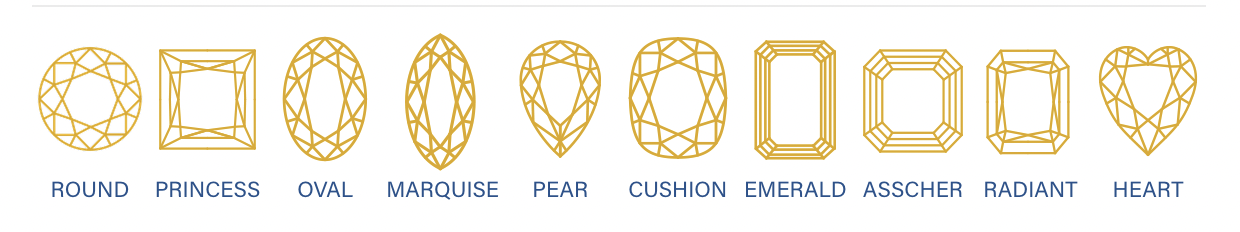

###  <center> According to the diamond industry, the main variables that determine value are the 4Cs:</center>
# <center>Cut, Color, Clarity, and Caret Weight</center>

---
# The imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV



In [2]:
df = pd.read_csv("../data/diamonds.csv")

In [3]:
df.tail(3)

,Unnamed: 0,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
219701,219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24
219703,219703,129630500,Pear,10.03,NaN,Yellow,NaN,NaN,Fancy Vivid,VVS2,...,NaN,NaN,NaN,NaN,NaN,None,GIA,1449881,NaN,2022-02-24


<br>

---

## Data wrangling
 1. What can reasonably be dropped?
 2. Deal with any NaN values.
 3. For the categorical variables, how much variety is there and what does it mean?
 4. What are ranges for the numerical data? This will get covered in the EDA section because of the the question of outliers.

### 1. What can reasonably be dropped?

In [4]:
for col in df:
    print(f"There are {df[col].isnull().sum()} nans in {col}")

There are 0 nans in Unnamed: 0
There are 0 nans in diamond_id
There are 0 nans in shape
There are 0 nans in size
There are 9162 nans in color
There are 210540 nans in fancy_color_dominant_color
There are 218642 nans in fancy_color_secondary_color
There are 217666 nans in fancy_color_overtone
There are 210542 nans in fancy_color_intensity
There are 0 nans in clarity
There are 60607 nans in cut
There are 0 nans in symmetry
There are 0 nans in polish
There are 0 nans in depth_percent
There are 0 nans in table_percent
There are 0 nans in meas_length
There are 0 nans in meas_width
There are 0 nans in meas_depth
There are 83433 nans in girdle_min
There are 84296 nans in girdle_max
There are 85741 nans in culet_size
There are 204385 nans in culet_condition
There are 203978 nans in fluor_color
There are 128 nans in fluor_intensity
There are 0 nans in lab
There are 0 nans in total_sales_price
There are 156917 nans in eye_clean
There are 0 nans in date


Three of the columns are useless: 
 * `Unnamed: 0` is just the same as the index
 * `df['date'].unique()` shows that the `date` values are all the same
 * `diamond_id` could make a decent index, but a serialized count is more useful in this case.
 
 So, let's ditch them.

In [5]:
df.drop(['Unnamed: 0', 'date', 'diamond_id'], axis=1, inplace=True)
df.head(2)

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
0,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,1.79,M,M,N,NaN,NaN,None,IGI,200,NaN
1,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,1.78,STK,STK,N,NaN,NaN,None,IGI,200,NaN


### 2. Deal with any NaN values

#### Before I commit to dropping all the NaNs, let's get an idea of how many that would be.


```
df.shape #(219704, 25)
df.dropna(axis=1, inplace=True)
df.shape #(219704, 12)
```
That looks like this:

| diamond_id | shape | size | clarity | symmetry | polish  | depth_percent | table_percent | meas_length | meas_width | meas_depth | lab | total_sales_price|
|---|---|---|---|---|---|---|---|---|---|---|---|---|			
| 131328926 | Round | 0.09 | VVS2 | Very Good | Very Good | 62.7 | 59.0 | 2.85 | 2.87 | 1.79 | IGI | 200 |
| 131704776 | Round | 0.09 | VVS2 | Very Good | Very Good | 61.9 | 59.0 | 2.84 | 2.89 | 1.78 | IGI | 200 |
| 131584417 | Round | 0.09 | VVS2 | Very Good | Very Good | 61.1 | 59.0 | 2.88 | 2.90 | 1.77 | IGI | 200 |


A check of `df.isnull().sum().sum()` returning 0, as expected.

#### Dropping the `NaN` values would keep all the rows (which is good) but I'd loose columns (bad)


This wouldn't be bad in that it doesn't get rid of too many columns but the ones it does are important. Carat, Color, Cut, and Clarity are what the diamond industry are the factors. So, this needs to be fixed.

In [6]:
df.fillna({'color':'unknown', 'cut':'unknown', 'eye_clean': 'unknown',
           'fancy_color_dominant_color': 'unknown', 'fancy_color_secondary_color': 'unknown',
           'fancy_color_overtone':'unknown', 'fancy_color_intensity':'unknown',  
           'girdle_min':'unknown', 'girdle_max':'unknown', 
           'culet_size':'unknown', 'culet_condition':'unknown',
           'fluor_color':'unknown', 'fluor_intensity':'unknown'   
          }, inplace=True)

In [7]:
df.isnull().sum().sum()

0

### 3. For the categorical variables, how much variety is there and what does it mean?


#####  Should it be needed, here's the code for the values of each column:

```
col_list = ['color', 'clarity', 'cut', 'symmetry','polish','lab','eye_clean', 'culet_size', 'lab','shape',
            'fancy_color_intensity','fancy_color_dominant_color','fancy_color_secondary_color',
            'fancy_color_overtone', 'fluor_color', 'fluor_intensity',]
            
for col in col_list:
    print(f" '{col}' has the following values: \n \t {df[col].unique()} \n")
```

##### The only column that is of any concern is the size column which looks to have a huge amount of outliers.

### 4. What are ranges for the numerical data?

In [8]:
df.describe()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05
mean,0.755176,61.683794,57.747579,5.548867,5.135623,3.285698,6.908035e+03
std,0.845892,9.915251,9.959906,1.763932,1.374527,2.054817,2.595944e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


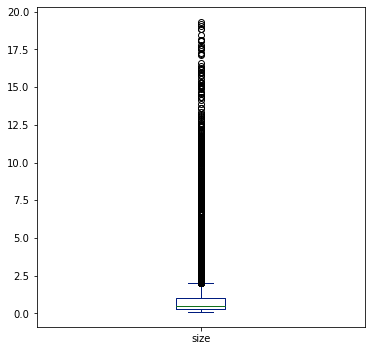

count    219704.000000
mean          0.755176
std           0.845892
min           0.080000
25%           0.310000
50%           0.500000
75%           1.000000
max          19.350000
Name: size, dtype: float64

In [9]:
sns.set_palette(palette='dark', n_colors=14)
df['size'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))
plt.show()

df['size'].describe()

#### I noticed this concided with a fairly large number of highly flawed diamonds and hypothesized they might be [melee diamonds](https://4cs.gia.edu/en-us/blog/melee-diamonds-tiny-diamonds-big-impact/)? which are .2 carat or less but would hard to tell since they're both small and colored. That is everything to the left and beneath the pink lines. 

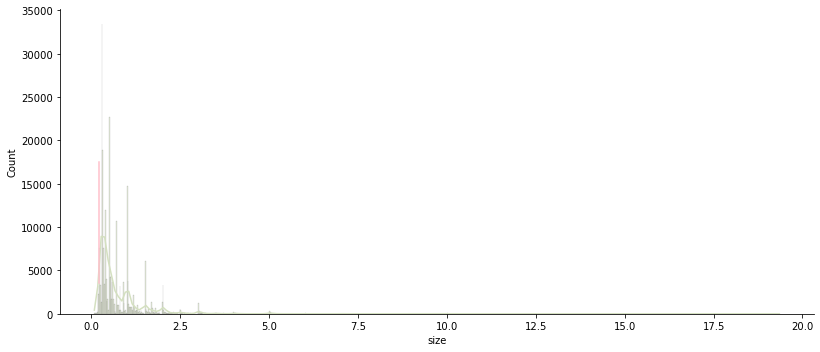

In [10]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)


sns.displot(data=df, x="size", kde=True, aspect=2.3)
plt.axvline(.2, 0.1, 0.5,  c='pink')

##### Oh, that's skewed. That's _really_ skewed. That's like a F2 distribution. Let's look at it a different way.

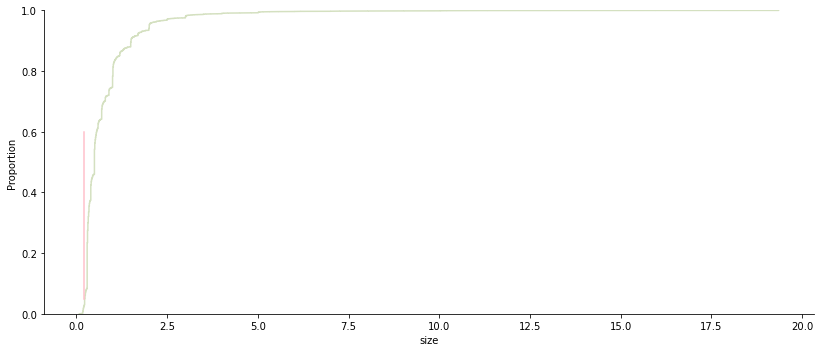

In [11]:
sns.displot(df, x="size", aspect=2.3,  kind="ecdf")
plt.axvline(.2, 0.05, 0.6, c='pink')

Well, that hypothesis was rejected! Additionally, [this lady](https://slate.com/human-interest/2013/01/dear-prudence-is-my-engagement-ring-diamond-too-small.html) has a 1/6 carat stone. Admittedly, it's an N of 1 but this is a world-wide market and not just a US market.

You would there there would be some stones we could rule out. The smallest size `df['size'].min()` is .08 carets and if we take everything at `df.loc[df['size'] <= .2]` and below that only 4805 rows. If we went with stones that were slightly smaller at .15 carat as the floor we could eliminate 263 rows.

##### But the real answer, at least for the lower end, is best found statistically and, from the box and whiskers in Cell 8 above, there aren't any outliers at the lower end. 

##### but what about the upper end? Do I really have to have all of these? like, who the heck is going to have a 18 carat ring?

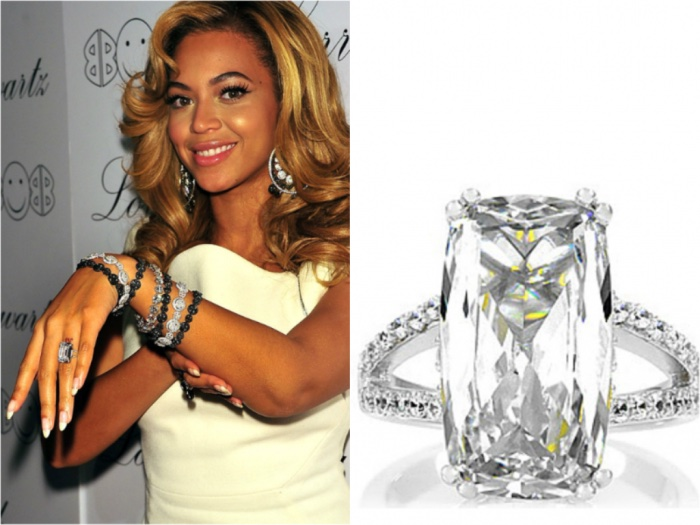

##### Oh, her. Wow. That's ... quite impressive. I guess that comment that this looks like a F2 distribution is about right.

### Normally we say there are outliers at:

## <center>${\big [}Q_{1}-k(Q_{3}-Q_{1}), Q_{3}+k(Q_{3}-Q_{1}){\big ]}$ </center>

But, in this case there are some reasons why not to remove outliers. Namely, the data isn't likely to be due an error in collection, and it's not clear if the outliers will affect the model results or not. Some estimators are highly sensitive to outliers; others aren't.

In this case the wisest choice will be to run models both ways.

---
<br>

# EDA

Sticking with the Cut, Color, Clarity, and Caret Weight order above ...

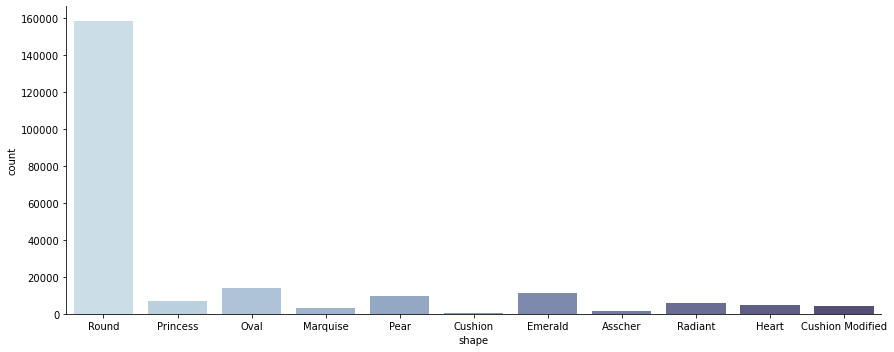

In [12]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
shapes = ['Round', 'Princess', 'Oval', 'Marquise', 'Pear', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Heart', 'Cushion Modified']
sns.catplot(x='shape', data=df, kind='count', order = shapes, aspect=2.5)


#df['shape'].value_counts()

Here's that graphic again to help in visulalizeing the shapes
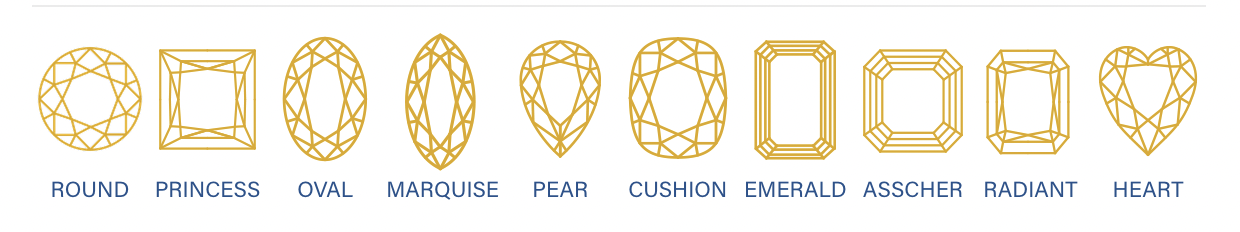

In [13]:
print(f"Round diamonds are roughly {round(160000/219704*100)}% of all diamonds in the set")

Round diamonds are roughly 73% of all diamonds in the set


**Next iteration though EDA** -- do a percent per diamond cut chart.

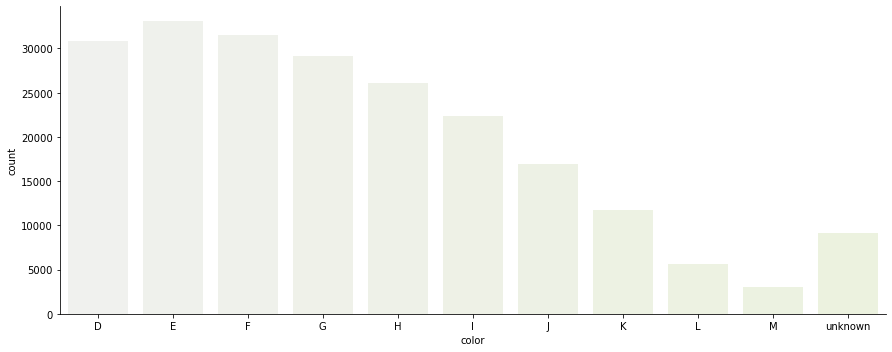

In [14]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'unknown']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.5)

#df['color'].value_counts()d

I just want to point out that getting the column colors to mimic the diamond colors by color grade is not particularly easy.

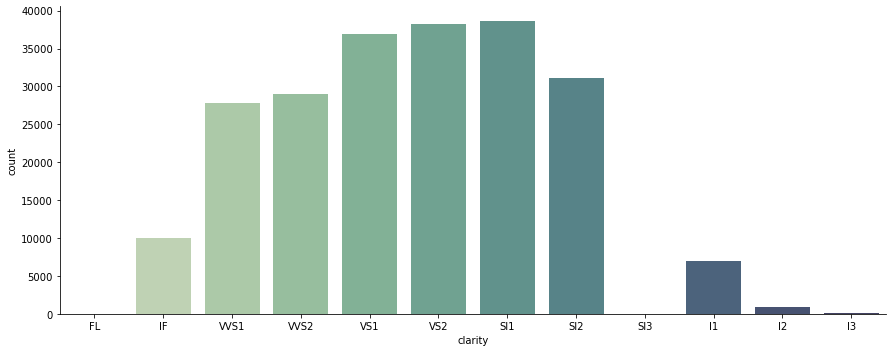

In [15]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.5)

#df['clarity'].value_counts()

**Next iteration though EDA** -- group the clarity ratings (e.g., VS1-VS2 or I1-I3),  and see what, if anything, we notice from plotting the results against, carat weight and color.

Are melee sized colored diamonds uncommon? It seems like they would be hard to see.

In [16]:
colored = df.loc[df['fancy_color_dominant_color'] != 'unknown' ]
sm_colored = colored.loc[df['size'] <= .2 ]
sm_colored

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
7708,Round,0.19,unknown,Yellow,unknown,None,Fancy,VVS1,Excellent,Very Good,...,2.26,TN,STK,unknown,unknown,unknown,None,IGI,616,unknown
7709,Round,0.19,unknown,Yellow,unknown,None,Fancy,SI1,Very Good,Very Good,...,2.27,STK,TK,unknown,unknown,unknown,None,IGI,616,unknown
7710,Round,0.19,unknown,Yellow,unknown,None,Fancy Light,VS2,Excellent,Very Good,...,2.25,VTN,M,unknown,unknown,unknown,None,IGI,616,unknown
7711,Round,0.19,unknown,Yellow,unknown,None,Fancy,VVS2,Very Good,Very Good,...,2.26,STK,TK,unknown,unknown,unknown,None,IGI,616,unknown
7712,Round,0.19,unknown,Yellow,unknown,None,Fancy,VS2,Excellent,Excellent,...,2.23,M,STK,unknown,unknown,unknown,None,IGI,616,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,Pear,0.20,unknown,Pink,unknown,unknown,Fancy,SI2,unknown,Good,...,1.96,TK,XTK,unknown,Pointed,unknown,Faint,GIA,16200,unknown
200035,Emerald,0.15,unknown,Pink,unknown,unknown,Fancy Intense,VS1,unknown,Good,...,1.58,M,VTK,N,unknown,unknown,Faint,GIA,16200,unknown
204086,Radiant,0.20,unknown,Blue,unknown,unknown,Fancy,VS1,unknown,Good,...,1.78,unknown,unknown,N,Pointed,unknown,None,GIA,18000,Yes
205701,Cushion Modified,0.20,unknown,Green,unknown,unknown,Fancy Intense,SI2,unknown,Very Good,...,2.11,M,XTK,unknown,Pointed,unknown,None,GIA,19800,unknown


### Ok, let's get this cleaned up. 

# Here's my hypothesis: Size is the main driver.

I don't think people really care about color because they really can't see it easily. Cuts I think are a matter of perference. A bad cut condition might have some negative impact but I don't think it will be much because there shouldn't be that many and the others could be concealed by the setting.

Also, I'm  putting my money on a boosted model like `XGBoost`.

I read that a 1 carat diamond costs range between [1800 and 12000](https://www.diamonds.pro/education/1-carat-diamond-ring/) dollars.

## Well, pitter patter. This data isn't going model itself

### Preparing the model

In [17]:
categoricals = df.select_dtypes(exclude=np.number).columns.to_list()
#categoricals

Now to convert the categoricals to something more numeric. And this brings an interesting question, is it faster to use the pandas `get_dummies` or scikit's `label_encoder`?

```
%timeit pd.get_dummies(df,df.columns[df.dtypes == 'object'])

212 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```
#### vs
```
%timeit label_encoder = preprocessing.LabelEncoder()

for col in categoricals:
    df[(col)]=label_encoder.fit_transform(df[(col)])
    
71.8 ns ± 0.0599 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
```
#### Pandas takes about 3 million times as long to do the operation. Wow! That's a _huge_ difference! 

In [18]:
label_encoder = preprocessing.LabelEncoder()

for col in categoricals:
    df[(col)]=label_encoder.fit_transform(df[(col)])

df.head(4)

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean
0,10,0.09,1,12,10,8,9,10,0,4,...,1.79,0,0,3,3,5,2,2,200,4
1,10,0.09,1,12,10,8,9,10,5,4,...,1.78,1,1,3,3,5,2,2,200,4
2,10,0.09,1,12,10,8,9,10,0,4,...,1.77,4,0,8,3,5,2,2,200,4
3,10,0.09,1,12,10,8,9,10,0,4,...,1.78,0,1,8,3,5,2,2,200,4


In [19]:
X = df.drop(columns=['total_sales_price'],axis=1)
y = df['total_sales_price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=314)

## Linear Regression for a baseline
```
72.4 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

RMSE: 16057.10618458078
R2  : 0.7728174575988863
```

In [21]:
lin_reg_model = LinearRegression()
model = lin_reg_model.fit(X_train, y_train)
y_hat= model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_hat)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_hat)))))

RMSE: 16057.10618458078
R2  : 0.7728174575988863


## RandomForestRegresson is considerably better but takes considerably longer.
```
1min 19s ± 648 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

RMSE: 9536.786677216744
R2  : 0.9262440179416279
```

In [22]:
# leave this commented unless you have a few extra minutes to spare

# rr  = RandomForestRegressor()
# rr.fit(X_train,y_train)
# y_pred = rr.predict(X_test)

# print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
# print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

In [23]:
print(f"""
Random Forest Regression has a {round((16057.1061-9536.7866)/16057.1061 *100 , 1)} % improvement over baseline in RMSE 
and a {round((.9262440179416279-.7728174575988863)/.7728174575988863 *100 , 1)} % improvement in R2
      
... but takes about 1,000x longer to run.""")

# Check these numbers because it's 3AM.


Random Forest Regression has a 40.6 % improvement over baseline in RMSE 
and a 19.9 % improvement in R2
      
... but takes about 1,000x longer to run.


In [24]:
# Decision Trees are marginally better than linear regression. Fast but max out at depth of 3.

tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 13921.257325084407
R2  : 0.8350244922620658


In [25]:
print(f"""
Decision Trees has a {round((16057.1061-13921.2573)/16057.1061 *100 , 1)} % improvement over baseline in RMSE 
and a {round((.9262440179416279-.8350244922620658)/.8350244922620658 *100 , 1)} % improvement in R2
""")


Decision Trees has a 13.3 % improvement over baseline in RMSE 
and a 10.9 % improvement in R2

